# Adding Data Labels to Plots

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
flights = sns.load_dataset('flights')
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


## Line Plot

In [3]:
# set up flights by year dataframe
year_flights = flights.groupby('year').sum().reset_index()
year_flights

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


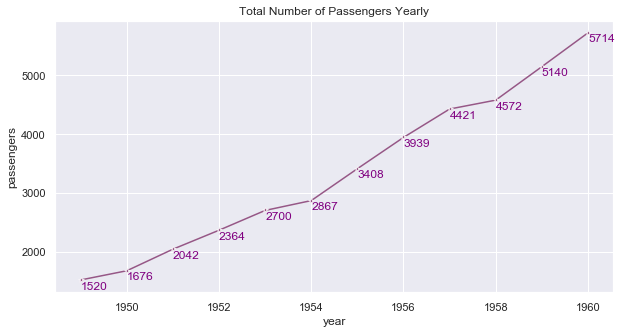

In [4]:
# plot line graph
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='year', y='passengers', data=year_flights, marker='*', color='#965786')

# title the plot
ax.set(title='Total Number of Passengers Yearly')

# label points on the plot
for x, y in zip(year_flights['year'], year_flights['passengers']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x,  # x-coordinate position of data label
             y = y-150,  # y-coordinate position of data label, adjusted to be 150 below the data point
             s = '{:.0f}'.format(y),  # data label, formatted to ignore decimals
             color = 'purple')  # set colour of line
#     plt.text(x, y-150, '{:.0f}'.format(y), color='white').set_backgroundcolor('#965786')


## Histogram

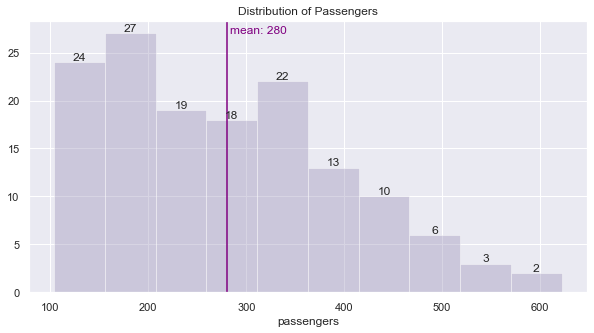

In [5]:
# plot histogram 
ax = sns.distplot(flights['passengers'], color='#9d94ba', bins=10, kde=False)
ax.set(title='Distribution of Passengers')

# adding a vertical line for the average passengers per flight
plt.axvline(flights['passengers'].mean(), color='purple', label='mean')

# adding data label to mean line
plt.text(x = flights['passengers'].mean()+3,  # x-coordinate position of data label, adjusted to be 3 right of the data point
         y = max([h.get_height() for h in ax.patches]),  # y-coordinate position of data label, to take max height 
         s = 'mean: {:.0f}'.format(flights['passengers'].mean()),  # data label
         color = 'purple')  # colour of the vertical mean line

# label each bar in histogram
for p in ax.patches:
    height = p.get_height()  # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2),  # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+0.2,  # y-coordinate position of data label, padded 0.2 above bar
            s = '{:.0f}'.format(height),  # data label, formatted to ignore decimals
            ha = 'center')  # sets horizontal alignment (ha) to center


## Bar Plots

### Vertical Bar Plot

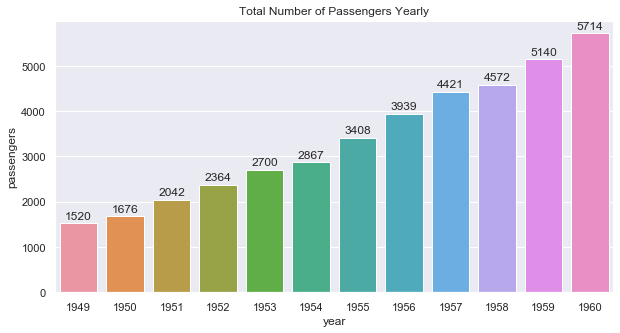

In [6]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='year', y='passengers', data=year_flights)
ax.set(title='Total Number of Passengers Yearly')  # title barplot

# label each bar in barplot
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2),  # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+100,  # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height),  # data label, formatted to ignore decimals
            ha = 'center')  # sets horizontal alignment (ha) to center


### Horizontal Bar Plot

In [7]:
# set up average number of passengers by month dataframe
month_flights = flights.groupby('month').agg({'passengers': 'mean'}).reset_index()
month_flights

,month,passengers
0,January,241.750000
1,February,235.000000
2,March,270.166667
3,April,267.083333
4,May,271.833333
5,June,311.666667
6,July,351.333333
7,August,351.083333
8,September,302.416667
9,October,266.583333


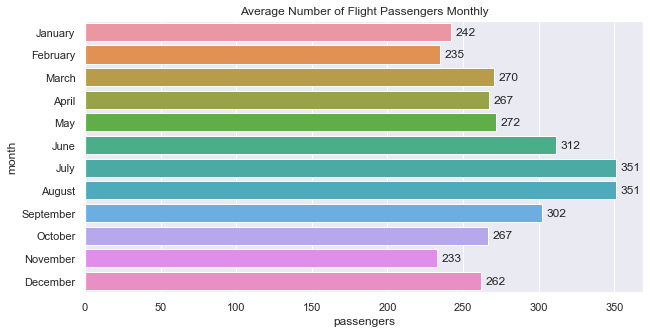

In [8]:
# plot horizontal barplot
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='passengers', y='month', data=month_flights, orient='h')
ax.set(title='Average Number of Flight Passengers Monthly')  # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width()  # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+3,  # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2),  # # y-coordinate position of data label, padded to be in the middle of the bar
            s = '{:.0f}'.format(width),  # data label, formatted to ignore decimals
            va = 'center')  # sets vertical alignment (va) to center


In [9]:
q1 = flights[flights['month'] == 'January'].quantile(0.25)['passengers']
q3 = flights[flights['month'] == 'January'].quantile(0.75)['passengers']
iqr = q3-q1
lim_min = q1 - 1.5*iqr
lim_max = q3 + 1.5*iqr

print('25th = {}, 75th = {}, IQR = {}, min = {}, max = {}'.format(q1, q3, iqr, lim_min, lim_max))

25th = 164.5, 75th = 321.25, IQR = 156.75, min = -70.625, max = 556.375


###### References

[matplotlib.text.Text.set_horizontalalignment](https://matplotlib.org/3.1.1/api/text_api.html#matplotlib.text.Text.set_horizontalalignment)

[seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

[seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

[seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
